<a href="https://colab.research.google.com/github/Molzard/PCVK-Ganjil-2025/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<p align="center">D. Tugas Praktikum</p>


---



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

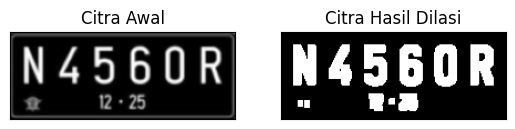

In [4]:
#Dilasi tanpa menggunakan library morphology

def dilasi_citra(F, w):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SED = np.ones((w, w), dtype=np.uint8)
    constant1 = (w - 1) // 2

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

# Baca dan threshold
img_d = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Proses dilasi
w = 5
imgD = dilasi_citra(thresh, w)

plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


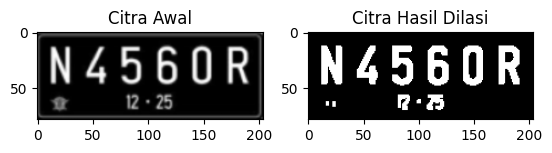

In [6]:
#Dilasi menggunakan library morphology

img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
# Threshold biner
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# Kernel 3x3
kernel = np.ones((3,3), np.uint8)
# Dilasi
dilasi = cv2.dilate(thresh, kernel, iterations=1)
# Tampilkan hasil
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilasi, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()


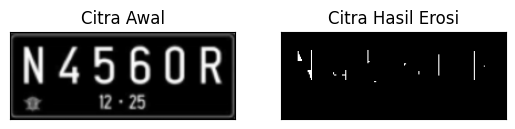

In [8]:
#Erosi tanpa menggunakan library morphology

def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape
    # Generate struktur elemen (SE)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    # Siapkan citra hasil
    imgE = np.zeros((m, n), dtype=np.uint8)
    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

img_e = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)

# Threshold biner
ret1, thresh1 = cv2.threshold(img_e, 99, 255, cv2.THRESH_BINARY)

# Ukuran kernel
k = 5

# Erosi
imgE = erosi_citra(thresh1, k)

plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

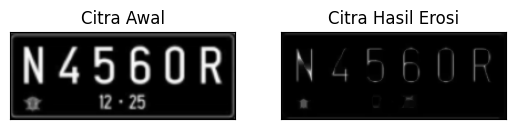

In [9]:
#Erosi menggunakan library morphology

img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

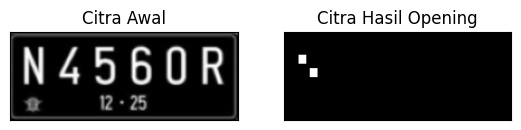

In [10]:
#Operasi Opening Menggunakan tanpa Library Morphology

img_o = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)

# Melakukan thresholding biner
reto, thresho = cv2.threshold(img_o, 100, 225, cv2.THRESH_BINARY)

# Nilai kernel
k = 7
# Operasi Opening: Erosi diikuti Dilasi
imgO = dilasi_citra(erosi_citra(thresho, k), k)

# Menampilkan hasil
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_o, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])

plt.show()

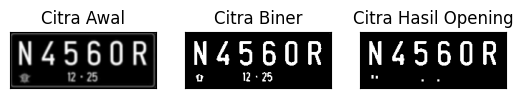

In [11]:
#Operasi Opening Menggunakan Library Morphology

img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
# Threshold biner
ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# Kernel (elemen struktur)
kernel = np.ones((3,3), np.uint8)
# Operasi morfologi Opening (Erosi -> Dilasi)
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# Tampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

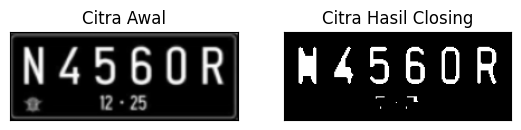

In [12]:
#Operasi closing tanpa library morphology

img_c = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)

# Melakukan thresholding biner
retc, threshc = cv2.threshold(img_c, 160, 225, cv2.THRESH_BINARY)

# Nilai kernel
k = 7
# Operasi Closing: Dilasi diikuti Erosi
imgC = erosi_citra(dilasi_citra(threshc, k), k)
# Menampilkan hasil
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_c, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(imgC, cmap='gray')
plt.title('Citra Hasil Closing')
plt.xticks([]), plt.yticks([])

plt.show()

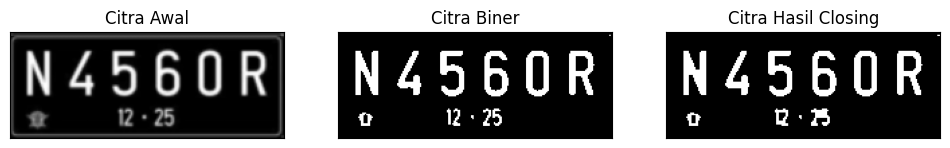

In [13]:
#Operasi closing menggunakan library morphology

img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)

# Melakukan thresholding biner
ret, thresh = cv2.threshold(img, 100, 225, cv2.THRESH_BINARY)

# Membuat kernel 3x3
kernel = np.ones((3, 3), np.uint8)

# Operasi Closing (dilasi diikuti erosi)
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Menampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing')
plt.xticks([]), plt.yticks([])

plt.show()

SED = Cross 3


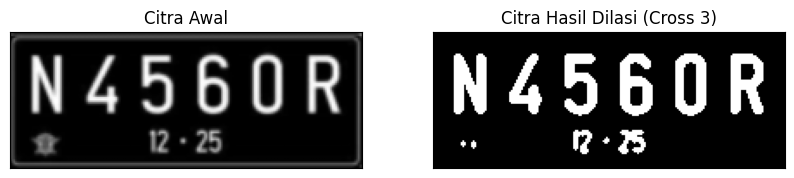

SED = Cross 5


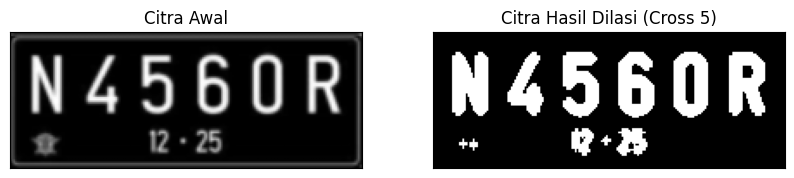

In [15]:
# Dilasi dengan Cross Structuring Element 3x3

def dilasi_citra(F, w):
    # Size image
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structure element dilasi (Cross 3x3)
    SED = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ], dtype=np.uint8)

    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD


print('SED = Cross 3')

img_d = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 3)')
plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi dengan Cross Structuring Element 5x5
def dilasi_citra(F, w):
    # Size image
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structure element dilasi (Cross 5x5)
    SED = np.array([
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]
    ], dtype=np.uint8)

    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD


print('SED = Cross 5')

img_d = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 5)')
plt.xticks([]), plt.yticks([])
plt.show()

SED = Circle 3


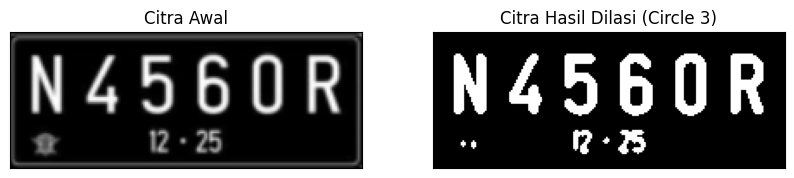

SED = Circle 5


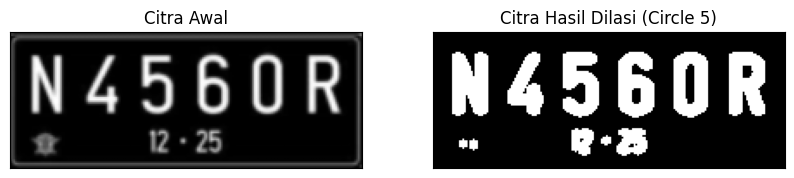

In [16]:
# Dilasi Circular Structuring Element (SED)
def dilasi_citra(F, w):
    # Size image
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structure element dilasi (Circular)
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Dilasi dengan Circular SED ukuran 3x3

print('SED = Circle 3')

img_d = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 3)')
plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi dengan Circular SED ukuran 5x5
print('SED = Circle 5')

img_d = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 5)')
plt.xticks([]), plt.yticks([])
plt.show()

SE = Rectangle 3x5


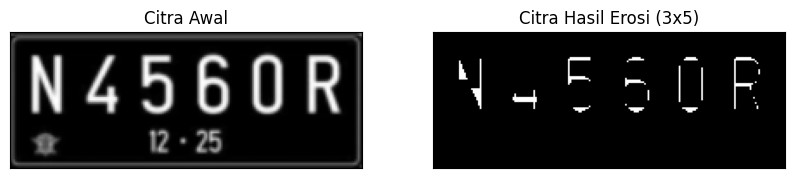

SE = Rectangle 5x7


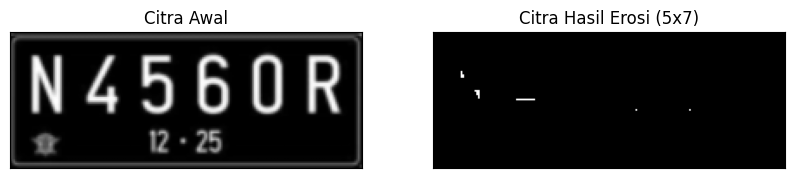

In [17]:
# Erosi Rectangle Structuring Element (SE)
def erosi_citra(F, p, l):
    # Size image
    m, n = F.shape

    # Generate structure element erosi (SE) persegi panjang
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))

    constant1 = (l - 1) // 2
    constant2 = (p - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i - constant1:i + constant1 + 1, j - constant2:j + constant2 + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Erosi dengan SE Rectangle 3x5
print('SE = Rectangle 3x5')

img_e = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 90, 225, cv2.THRESH_BINARY)
p = 5
l = 3
imgE = erosi_citra(thresh1, p, l)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi (3x5)')
plt.xticks([]), plt.yticks([])
plt.show()

# Erosi dengan SE Rectangle 5x7
print('SE = Rectangle 5x7')

img_e = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 90, 225, cv2.THRESH_BINARY)
p = 7
l = 5
imgE = erosi_citra(thresh1, p, l)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi (5x7)')
plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 3


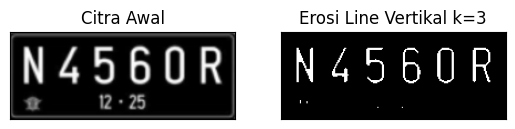

SE = Line Vertikal 5


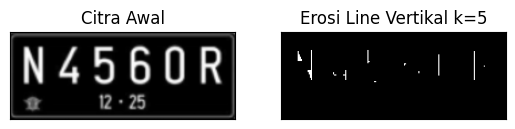

In [19]:
# Fungsi erosi dengan SE line vertikal
def erosi_citra(F, k):
    # size image
    m, n = F.shape

    # Generate structure element erosi (SE) berbentuk line vertikal
    SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, k))
    #SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 3))
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi manual
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# EROSI LINE VERTIKAL k3
print('SE = Line Vertikal 3')
img_e = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/platnomor.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 100, 255, cv2.THRESH_BINARY)

k = 3
imgE = erosi_citra(thresh1, k)

plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgE, cmap='gray')
plt.title('Erosi Line Vertikal k=3'), plt.xticks([]), plt.yticks([])
plt.show()


# EROSI LINE VERTIKAL k5
print('SE = Line Vertikal 5')
ret1, thresh1 = cv2.threshold(img_e, 100, 255, cv2.THRESH_BINARY)

k = 5
imgE = erosi_citra(thresh1, k)

plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgE, cmap='gray')
plt.title('Erosi Line Vertikal k=5'), plt.xticks([]), plt.yticks([])
plt.show()


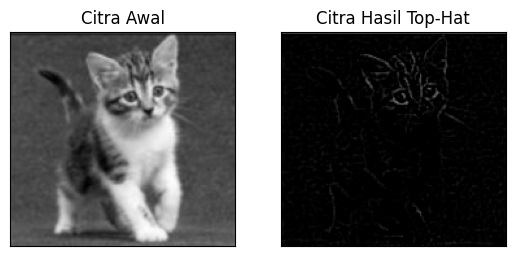

In [20]:
# Membuat kernel Top-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca dan konversi citra ke grayscale
img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/kitten.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Operasi Top-Hat
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Menampilkan hasil
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil Top-Hat'), plt.xticks([]), plt.yticks([])
plt.show()

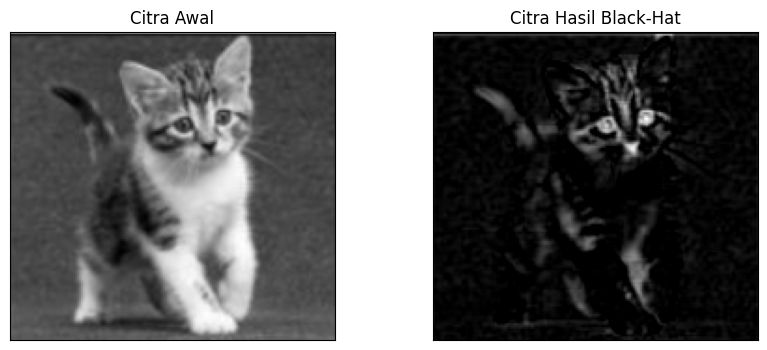

In [21]:
# Membuat kernel Black-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca dan konversi citra ke grayscale
img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/kitten.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Membuat kernel berukuran lebih besar untuk operasi Black-Hat
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))

# Operasi Black-Hat (menonjolkan area gelap kecil di atas latar terang)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black-Hat'), plt.xticks([]), plt.yticks([])
plt.show()


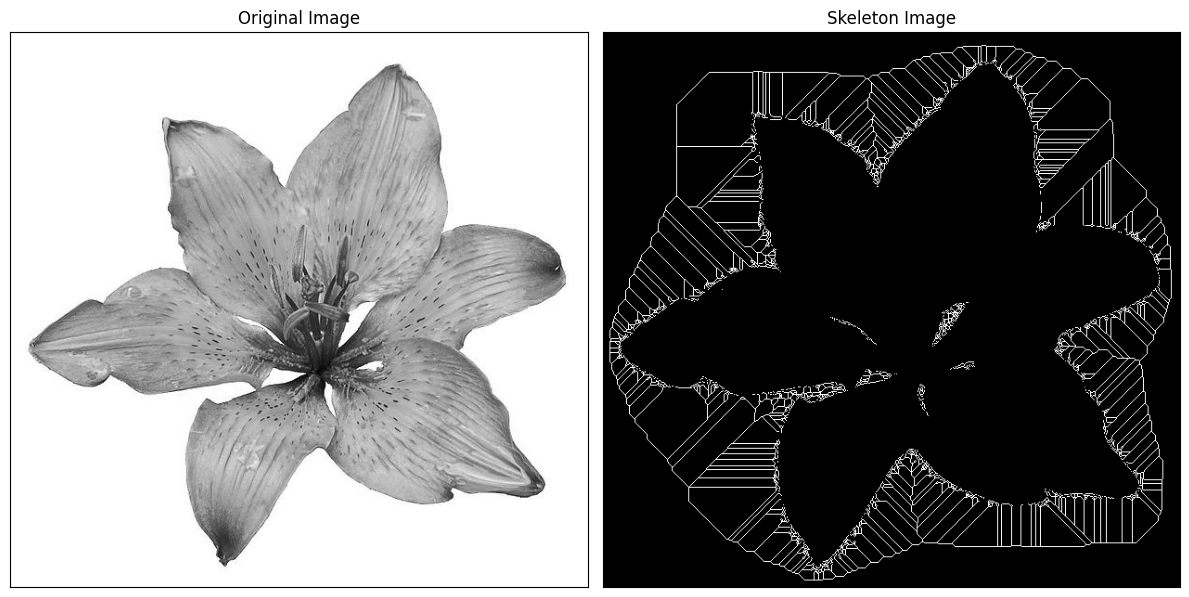

In [23]:
from skimage import filters
from skimage.morphology import skeletonize

# Membaca citra grayscale
img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/lily.jpg', 0)

# Binarisasi menggunakan metode threshold Triangle
thresh_val = filters.threshold_triangle(img)
binary = img > thresh_val

# Konversi nilai boolean ke 0 dan 1
binary_cp = binary.astype(np.uint8)

# Proses skeletonisasi
skeleton = skeletonize(binary_cp)

# Menampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.savefig("binary_and_bin_skeleton.png")
plt.show()


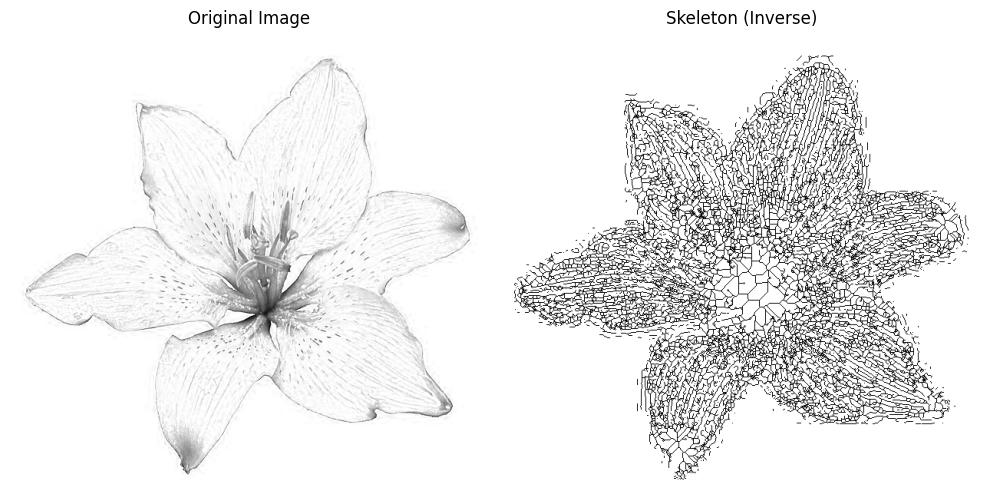

In [24]:
from skimage import io, filters
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

# Membaca citra (ambil channel pertama/grayscale)
img = io.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/lily.jpg')[..., 0]

# Binarisasi: bagian hitam menjadi True
binary = img < filters.threshold_triangle(img)

# Proses skeletonisasi
skeleton = skeletonize(binary)

# Menampilkan hasil
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Skeleton ditampilkan dengan colormap terbalik (gray_r)
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('Skeleton (Inverse)')
ax[1].axis('off')

plt.tight_layout()
plt.show()


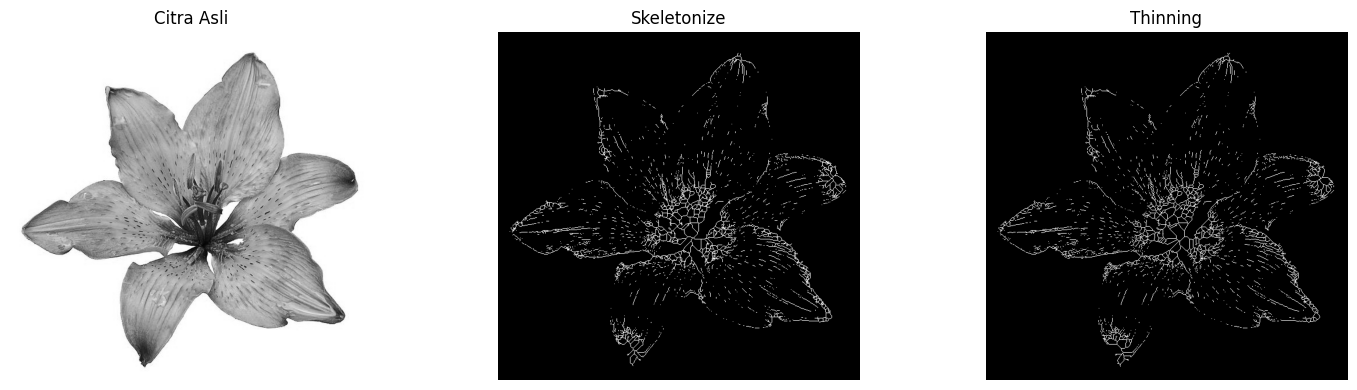

In [25]:
from skimage import img_as_float, io, color, morphology
import matplotlib.pyplot as plt

# Membaca citra dan konversi ke grayscale float
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week10/lily.jpg')))

# Binarisasi manual (piksel gelap menjadi True)
image_binary = image < 0.5

# Proses skeletonisasi dan thinning
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

# Tampilkan hasil
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))

ax0.imshow(image, cmap='gray')
ax0.set_title('Citra Asli')
ax0.axis('off')

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')
ax1.axis('off')

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thinning')
ax2.axis('off')

plt.tight_layout()
plt.show()
